In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [3]:
# Set hyperparameters
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 10  
learning_rate = 1e-4
epochs = 20


In [4]:
# Load VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)


2024-11-23 22:22:47.629879: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-23 22:22:47.629902: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-23 22:22:47.629906: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-23 22:22:47.629919: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-23 22:22:47.629928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 396,554 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data generator
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load your dataset directories
train_dir = '/Users/ajay/Downloads/imagenette2/train'  # Replace with your dataset path
val_dir = '/Users/ajay/Downloads/imagenette2/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [10]:
# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

/opt/anaconda3/envs/vggnet/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2024-11-23 20:39:00.999207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.1557 - loss: 2.3269

/opt/anaconda3/envs/vggnet/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 174s 585ms/step - accuracy: 0.1559 - loss: 2.3263 - val_accuracy: 0.6005 - val_loss: 1.5690 - learning_rate: 1.0000e-04
Epoch 2/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 220s 743ms/step - accuracy: 0.4246 - loss: 1.6661 - val_accuracy: 0.7146 - val_loss: 1.0687 - learning_rate: 1.0000e-04
Epoch 3/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 226s 764ms/step - accuracy: 0.5582 - loss: 1.2913 - val_accuracy: 0.7541 - val_loss: 0.8374 - learning_rate: 1.0000e-04
Epoch 4/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 230s 777ms/step - accuracy: 0.6230 - loss: 1.1144 - val_accuracy: 0.7834 - val_loss: 0.7297 - learning_rate: 1.0000e-04
Epoch 5/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 234s 792ms/step - accuracy: 0.6698 - loss: 1.0019 - val_accuracy: 0.8066 - val_loss: 0.6394 - learning_rate: 1.0000e-04
Epoch 6/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 231s 780ms/step - accuracy: 0.7031 - loss: 0.9134 - val_accuracy: 0.8217 - val_loss: 0.5860 - learning_rate: 1.0000e-04
Epoch 7/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 227s 768ms/

In [12]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

123/123 ━━━━━━━━━━━━━━━━━━━━ 56s 457ms/step - accuracy: 0.8725 - loss: 0.3961
Validation Loss: 0.3876
Validation Accuracy: 0.8739


In [14]:
model.save('/Users/ajay/Downloads/vgg16_model.keras')  
print("Model saved successfully!")

Model saved successfully!


Found 3925 files belonging to 10 classes.
Class names: ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


2024-11-23 22:25:42.379149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


/opt/anaconda3/envs/vggnet/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Accuracy on the randomly selected subset: 80.00%


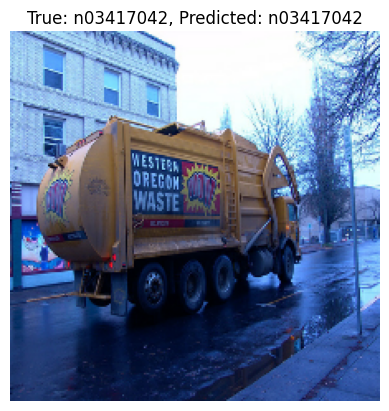

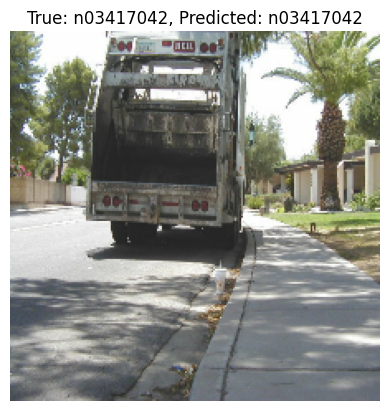

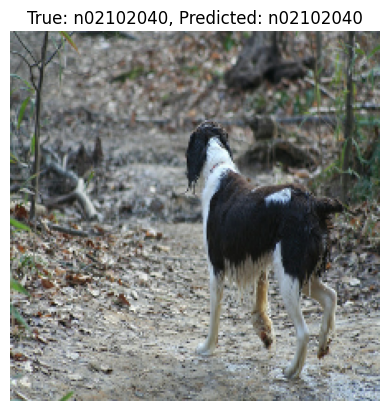

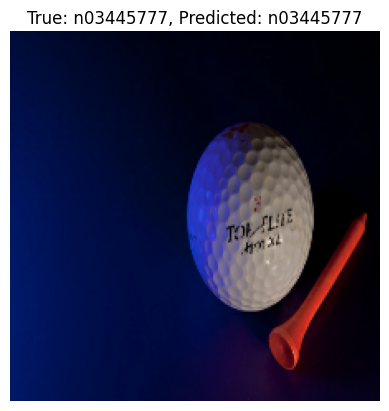

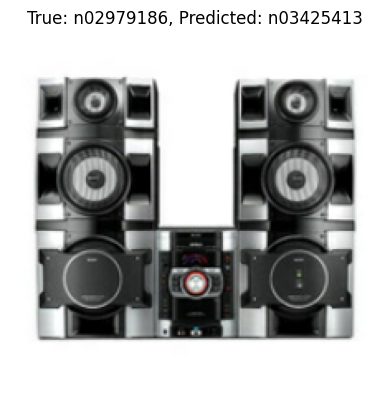

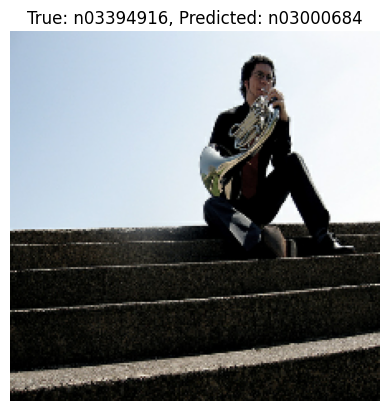

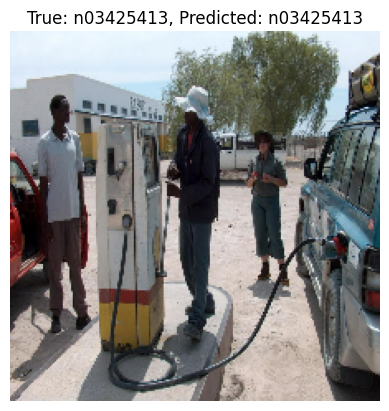

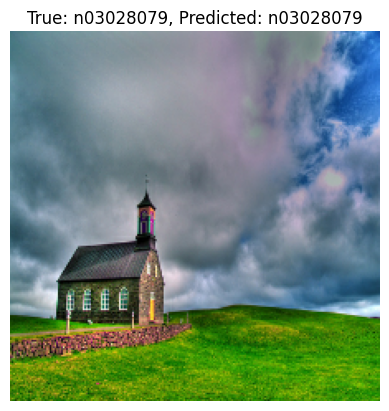

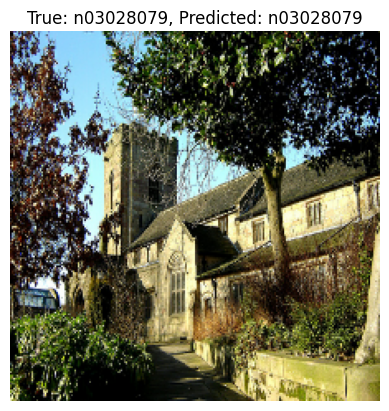

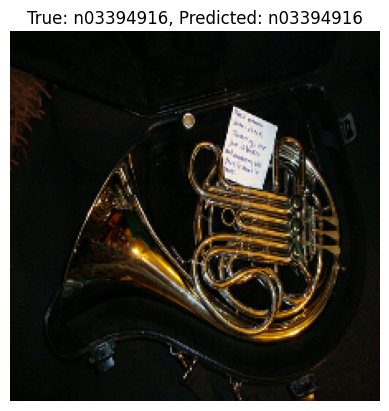

In [12]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

# Parameters
data_dir = '/Users/ajay/Downloads/imagenette2/val'  
img_height = 224  
img_width = 224   
batch_size = 32   
model_path = '/Users/ajay/Downloads/vgg16_model.keras'

# 1. Load Validation Data from Directory
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True  
)

# Get class names from subfolders
class_names = val_dataset.class_names
print(f"Class names: {class_names}")

# Convert dataset to numpy arrays for easy manipulation
def dataset_to_numpy(dataset):
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

val_images_full, val_labels_full = dataset_to_numpy(val_dataset)

# 2. Randomly Select 10 Images and Their Labels
def select_random_subset(images, labels, num_samples=10, seed=None):
    np.random.seed(seed)  # Set seed for reproducibility (optional)
    indices = np.random.choice(len(images), size=num_samples, replace=False)
    selected_images = images[indices]
    selected_labels = labels[indices]
    return selected_images, selected_labels

# Select random images and labels
val_images, val_labels = select_random_subset(val_images_full, val_labels_full, num_samples=10, seed=42)

# 3. Load the Saved Model
model = tf.keras.models.load_model(model_path)  

# 4. Predict Using the Model
predictions = model.predict(val_images)  # Get probabilities/logits
predicted_classes = np.argmax(predictions, axis=1)  # Convert to class indices

# 5. Compute Accuracy
accuracy = accuracy_score(val_labels, predicted_classes)
print(f"Accuracy on the randomly selected subset: {accuracy * 100:.2f}%")

# 6. Visualize Results
for i, (img, true_label, pred_label) in enumerate(zip(val_images, val_labels, predicted_classes)):
    plt.imshow(img.astype("uint8"))  # Show the image 
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()


In [2]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model = load_model('/Users/ajay/Downloads/vgg16_model.keras')

# Set up validation data generator
validation_dir = '/Users/ajay/Downloads/imagenette2/val'
input_shape = (224, 224)  # Input shape expected by the model
batch_size = 32

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Scale pixel values
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the true labels from the validation set
true_labels = validation_generator.classes

# Generate predictions using the model
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

# Print classification report
report = classification_report(true_labels, predicted_classes, target_names=validation_generator.class_indices.keys())
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", report)


Found 3925 images belonging to 10 classes.


/opt/anaconda3/envs/vggnet/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-11-24 19:55:52.175678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


123/123 ━━━━━━━━━━━━━━━━━━━━ 50s 406ms/step
Accuracy: 0.87
Precision: 0.88
F1 Score: 0.87

Classification Report:
               precision    recall  f1-score   support

   n01440764       0.88      0.89      0.89       387
   n02102040       0.93      0.88      0.90       395
   n02979186       0.94      0.83      0.88       357
   n03000684       0.70      0.82      0.75       386
   n03028079       0.88      0.98      0.93       409
   n03394916       0.89      0.85      0.87       394
   n03417042       0.87      0.88      0.88       389
   n03425413       0.82      0.83      0.82       419
   n03445777       0.95      0.90      0.93       399
   n03888257       0.93      0.89      0.91       390

    accuracy                           0.87      3925
   macro avg       0.88      0.87      0.87      3925
weighted avg       0.88      0.87      0.87      3925

